<a href="https://colab.research.google.com/github/e19166/e19-4yp-Dynamic-Multi-Dimensional-Resource-Orchestration-in-Kubernetes/blob/main/results/randpw_both_limits_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('randpw_both_limits_reduction.csv')
df.head()  # to preview the data

,Timestamp,Service,CPU Request,Memory Request,CPU Limit,Memory Limit,Latency,CPU Usage,Memory Usage,CPU Throttling,Memory Working Set
0,2025-05-12T17:08:48.554000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.004692,0.003707,142135296,82.506024,140148736
1,2025-05-12T17:09:18.650000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.004650,0.004450,142135296,82.506024,140148736
2,2025-05-12T17:09:48.749000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.004650,0.003274,142135296,82.506024,140148736
3,2025-05-12T17:10:18.839000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.004639,0.003656,142135296,82.506024,140148736
4,2025-05-12T17:10:48.938000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.004792,0.003124,142135296,82.506024,140148736


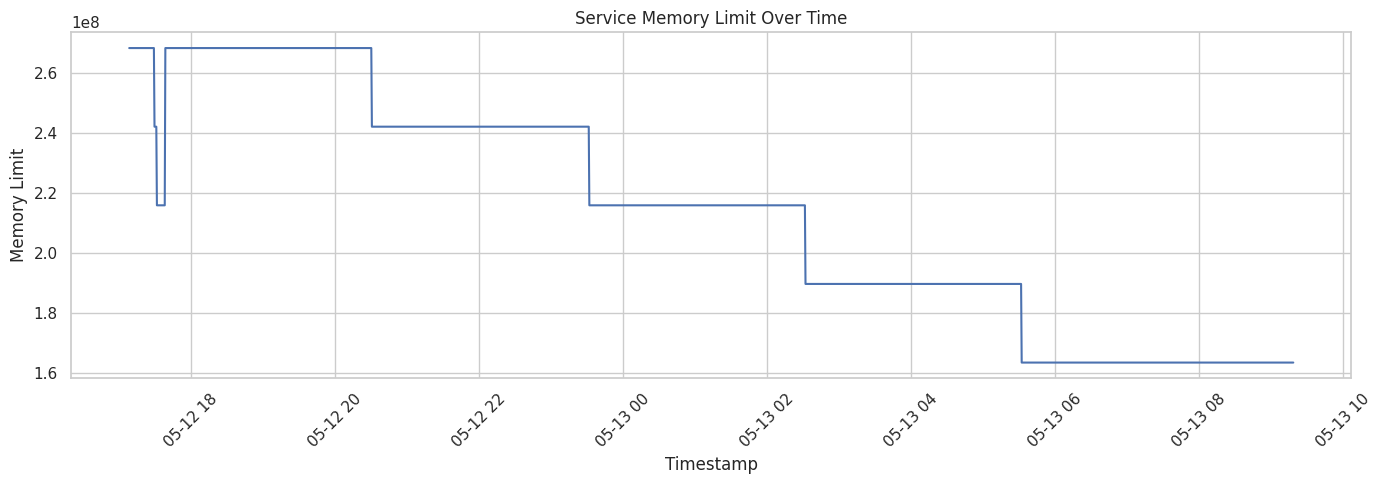

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')


# Set visual style
sns.set(style="whitegrid")

# Plotting functions
def plot_time_series(x, y, ylabel, title):
  plt.figure(figsize=(14, 5))
  sns.lineplot(x=x, y=y)
  plt.ylabel(ylabel)
  plt.xlabel("Timestamp")
  plt.title(title)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 1. Latency over time
plot_time_series(df['Timestamp'], df['Memory Limit'], 'Memory Limit', 'Service Memory Limit Over Time')

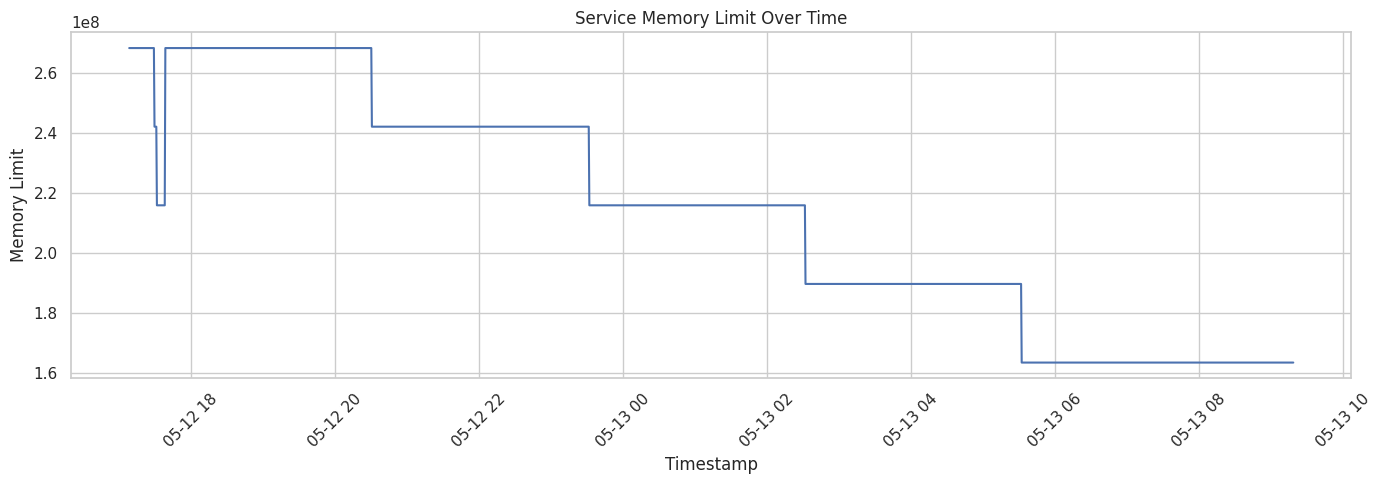

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')


# Set visual style
sns.set(style="whitegrid")

# Plotting functions
def plot_time_series(x, y, ylabel, title):
  plt.figure(figsize=(14, 5))
  sns.lineplot(x=x, y=y)
  plt.ylabel(ylabel)
  plt.xlabel("Timestamp")
  plt.title(title)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 1. Latency over time
plot_time_series(df['Timestamp'], df['Memory Limit'], 'Memory Limit', 'Service Memory Limit Over Time')

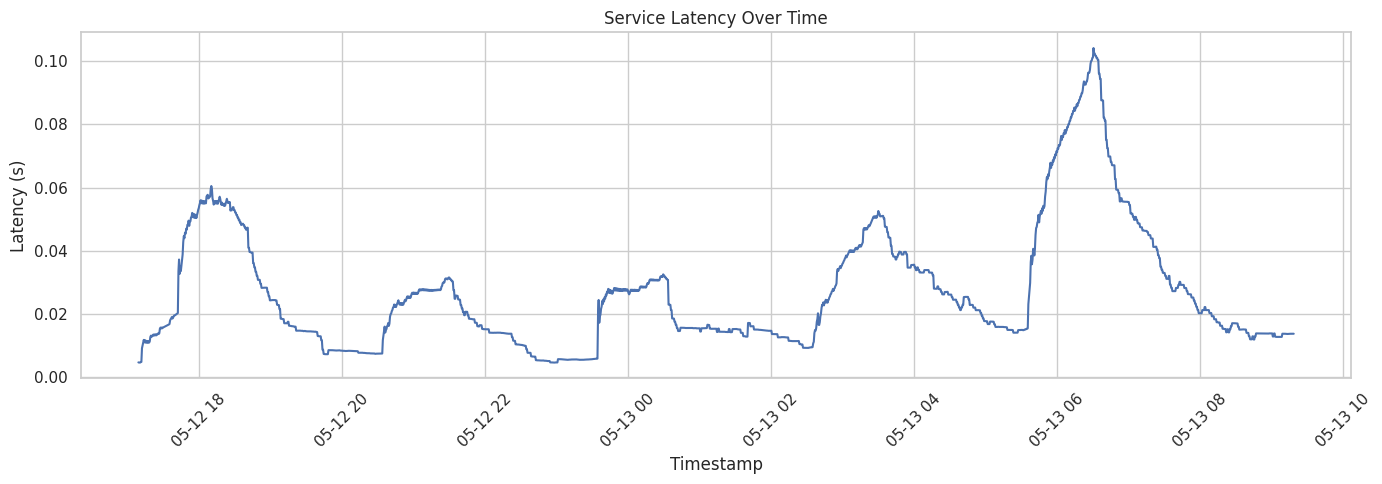

In [5]:
# 1. Latency over time
plot_time_series(df['Timestamp'], df['Latency'], 'Latency (s)', 'Service Latency Over Time')

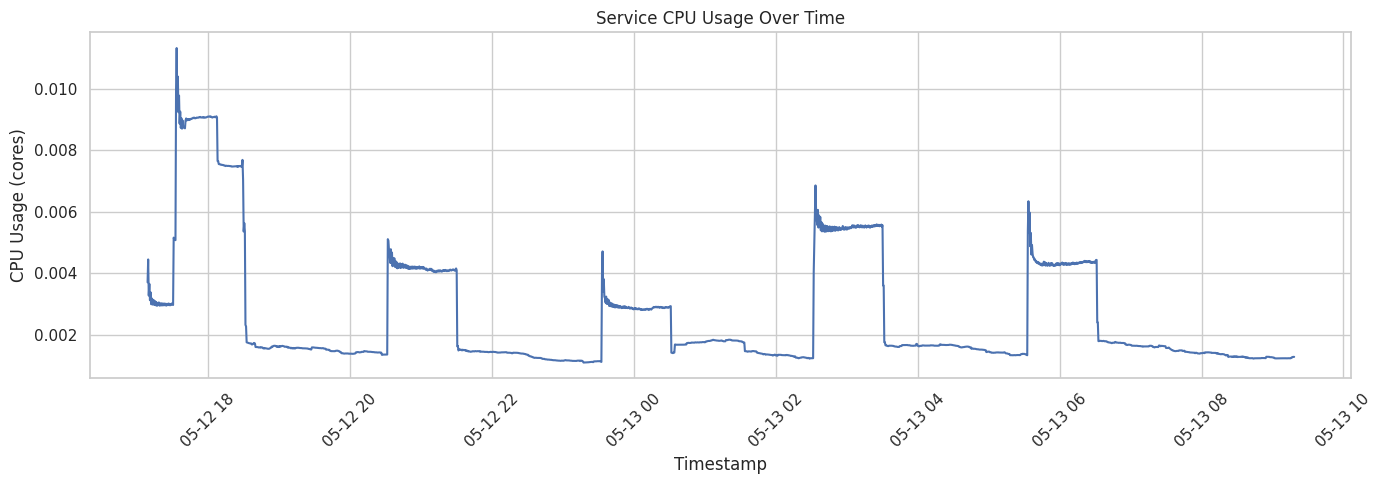

In [6]:
# 1. Latency over time
plot_time_series(df['Timestamp'], df['CPU Usage'], 'CPU Usage (cores)', 'Service CPU Usage Over Time')

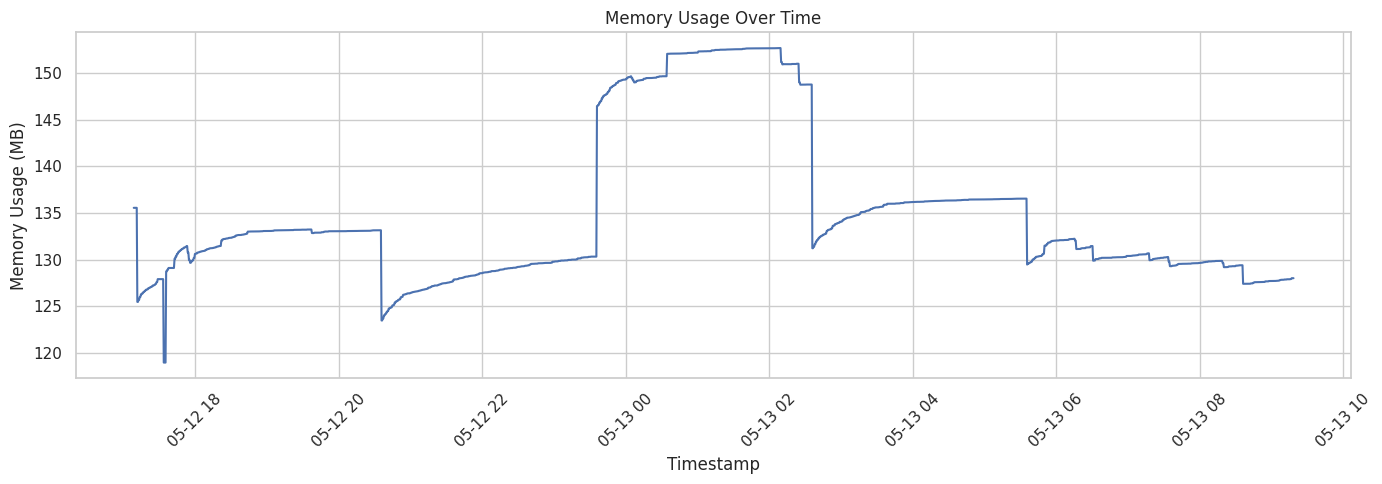

In [7]:
# 3. Memory Usage over time
plot_time_series(df['Timestamp'], df['Memory Usage'] / (1024 ** 2), 'Memory Usage (MB)', 'Memory Usage Over Time')

<ipython-input-8-b30dbe2c1d19>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  memory_latency_avg = df.groupby('Memory_Bin')['Latency'].mean().reset_index()


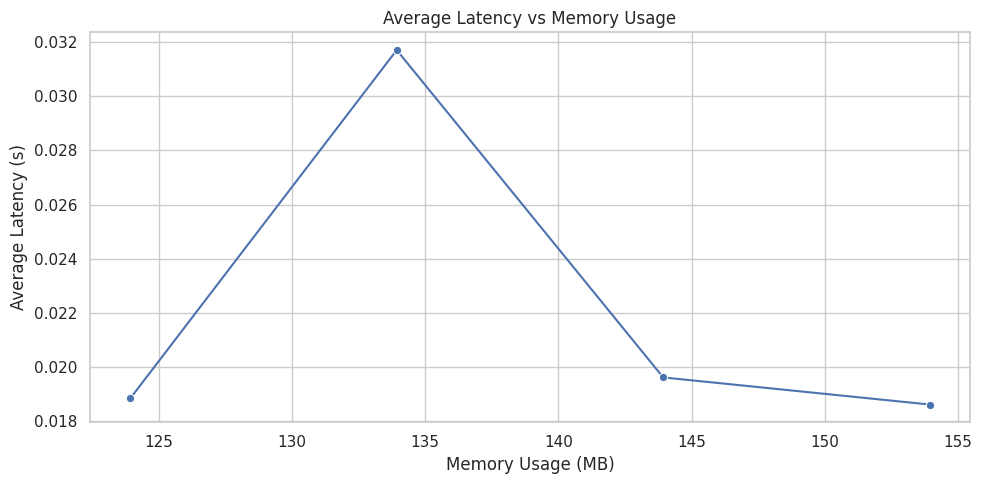

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert memory to MB
df['Memory_MB'] = df['Memory Usage'] / (1024 ** 2)

# Bin memory usage in 10 MB intervals
bins = np.arange(df['Memory_MB'].min(), df['Memory_MB'].max() + 10, 10)
df['Memory_Bin'] = pd.cut(df['Memory_MB'], bins)

# Group by memory bin and calculate average latency
memory_latency_avg = df.groupby('Memory_Bin')['Latency'].mean().reset_index()

# Drop bins with NaN latency (no data)
memory_latency_avg = memory_latency_avg.dropna()

# Use bin midpoints for plotting
memory_latency_avg['Memory_Mid'] = memory_latency_avg['Memory_Bin'].apply(lambda x: x.mid)

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Memory_Mid', y='Latency', data=memory_latency_avg, marker='o')
plt.xlabel('Memory Usage (MB)')
plt.ylabel('Average Latency (s)')
plt.title('Average Latency vs Memory Usage')
plt.grid(True)
plt.tight_layout()
plt.show()